In [1]:
import tensorflow as tf
import numpy as np

## Defining variables

In [2]:
from tensorflow import Variable
# Define the 1-dimensional variable A1
A1 = Variable([1, 2, 3, 4])

# Print the variable A1
print('\n A1: ', A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print('\n B1: ', B1)


 A1:  <tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4])>

 B1:  [1 2 3 4]


## Performing element-wise multiplication

In [3]:
from tensorflow import multiply, constant, ones_like
# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = ones_like(A1)
B23 = ones_like(A23)

# Perform element-wise multiplication
C1 = multiply(A1,B1)
C23 = multiply(A23,B23)

# Print the tensors C1 and C23
print('\n C1: {}'.format(C1.numpy()))
print('\n C23: {}'.format(C23.numpy()))


 C1: [1 2 3 4]

 C23: [[1 2 3]
 [1 6 4]]


## Making predictions with matrix multiplication

In [4]:
from tensorflow import matmul
# Define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = matmul(features, params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

[[-1687]
 [-3218]
 [-1933]
 [57850]]


## Setting the data type

In [5]:
import pandas as pd
housing = pd.read_csv('kc_house_data.csv')
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


## Set up a linear regression

In [6]:
from tensorflow import keras
price_log = np.log(housing['price'].values)
size_log = np.log(housing['sqft_living'].values)
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept+slope*features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
	return keras.losses.mse(targets, predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

148.91295694532656
84.30899941394759


## Train a linear model

14.34735
8.2266245
3.5242982
0.2202686
0.52341163
0.2284866
0.2026396
0.15438248
0.16139135
0.15495746


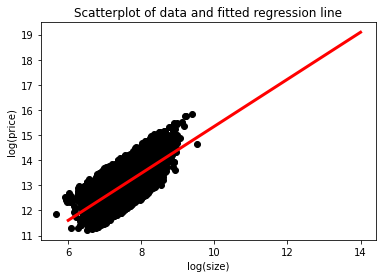

In [7]:
import matplotlib.pyplot as plt
def plot_results(intercept, slope):
	size_range = np.linspace(6,14,100)
	price_pred = [intercept+slope*s for s in size_range]
	plt.scatter(size_log, price_log, color = 'black')
	plt.plot(size_range, price_pred, linewidth=3.0, color='red')
	plt.xlabel('log(size)')
	plt.ylabel('log(price)')
	plt.title('Scatterplot of data and fitted regression line')
	plt.show()

intercept= Variable(5.0)
slope = Variable(0.001)
opt = keras.optimizers.Adam(0.5)
for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

# Plot data and regression line
plot_results(intercept, slope)

## Mutiple linear regression

In [8]:
bedrooms = housing['bedrooms'].values
params = Variable([0.1, 0.05, 0.02])
def print_results(params):
	return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'.format(loss_function(params).numpy(), params[0].numpy(), params[1].numpy(), params[2].numpy()))
# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  
	# Use the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print_results(params)

loss: 12.491, intercept: 0.101, slope_1: 0.051, slope_2: 0.021
loss: 12.479, intercept: 0.102, slope_1: 0.052, slope_2: 0.022
loss: 12.467, intercept: 0.103, slope_1: 0.053, slope_2: 0.023
loss: 12.455, intercept: 0.104, slope_1: 0.054, slope_2: 0.024
loss: 12.443, intercept: 0.105, slope_1: 0.055, slope_2: 0.025
loss: 12.431, intercept: 0.106, slope_1: 0.056, slope_2: 0.026
loss: 12.419, intercept: 0.107, slope_1: 0.057, slope_2: 0.027
loss: 12.408, intercept: 0.108, slope_1: 0.058, slope_2: 0.028
loss: 12.396, intercept: 0.109, slope_1: 0.059, slope_2: 0.029
loss: 12.384, intercept: 0.110, slope_1: 0.060, slope_2: 0.030


## Preparing to batch train

In [9]:
# Define the intercept and slope
intercept = Variable(10.0, tf.float32)
slope = Variable(0.5, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept+slope*features

# Define the loss function
def loss_function(intercept, slope, targets, features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)
    
 	# Define the MSE loss
	return keras.losses.mse(targets, predictions)

# Initialize adam optimizer
opt = keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
	size_batch = np.array(batch['sqft_lot'], np.float32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

10.217888 0.7016


## The linear algebra of dense layers

In [10]:
borrower_features = Variable([[2.0,2.0,43.0]], tf.float32)
# Initialize bias1
bias1 = Variable(1.0)

# Initialize weights1 as 3x2 variable of ones
weights1 = Variable(tf.ones((3, 2)))

# Perform matrix multiplication of borrower_features and weights1
product1 = matmul(borrower_features, weights1)

# Apply sigmoid activation function to product1 + bias1
dense1 = keras.activations.sigmoid(product1 + bias1)

# Print shape of dense1
print("\n dense1's output shape: {}".format(dense1.shape))


 dense1's output shape: (1, 2)


## Using dense layer operation

In [11]:
df = pd.read_csv('uci_credit_card.csv')
df = df.loc[0:99, 'BILL_AMT1':'default.payment.next.month']
borrower_features = df.drop('default.payment.next.month', axis = 1).values
default = df['default.payment.next.month']
# Define the first dense layer
dense1 = keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = keras.layers.Dense(3, activation = 'sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = keras.layers.Dense(1, activation = 'sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)


 shape of dense1:  (100, 7)

 shape of dense2:  (100, 3)

 shape of predictions:  (100, 1)


## Multiclass classification problems

In [12]:
# Construct input layer from borrower features
inputs = constant(borrower_features, tf.float32)

# Define first dense layer
dense1 = keras.layers.Dense(10, activation='sigmoid')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(8, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(6, activation='softmax')(dense2) #softmax returns the probability

# Print first five predictions
print(outputs.numpy()[:5])

[[0.08776048 0.18548538 0.24172519 0.02597991 0.41484648 0.04420258]
 [0.07116393 0.18340129 0.23964554 0.01846683 0.460915   0.02640742]
 [0.07116393 0.18340129 0.23964554 0.01846683 0.460915   0.02640742]
 [0.07116393 0.18340129 0.23964554 0.01846683 0.460915   0.02640742]
 [0.07551124 0.20253722 0.2398144  0.00949696 0.45472813 0.01791209]]


## The danger of local minima

In [13]:
import math
# Initialize x_1 and x_2
x_1 = Variable(6.0,tf.float32)
x_2 = Variable(0.3,tf.float32)

# Define the optimization operation
opt = keras.optimizers.SGD(learning_rate=0.01)

#Define loss function
def loss_function(x):
	return 4.0*math.cos(x-1)+(math.cos(2.0*math.pi*x)/x)

for j in range(100):
	# Perform minimization using the loss function and x_1
	opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
	# Perform minimization using the loss function and x_2
	opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

6.027515 0.25


## Avoid local minima

In [14]:
# Initialize x_1 and x_2
x_1 = Variable(0.05,tf.float32)
x_2 = Variable(0.05,tf.float32)

# Define the optimization operation for opt_1 and opt_2
opt_1 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.99)
opt_2 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.00)

for j in range(100):
	opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Define the minimization operation for opt_2
	opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

2.7445114 0.24999999


In [16]:
df1 = pd.read_csv('uci_credit_card.csv')
df1.shape
borrower_fea = df1.loc[0:2499, 'LIMIT_BAL':'PAY_AMT6'].values
borrower_fea = tf.cast(borrower_fea, tf.float32)


In [18]:
default1 = df1.loc[0:2499,'default.payment.next.month'].values
default1 = default1.reshape(-1,1)

## Training network in Tensorflow

In [19]:
# Define the layer 1 weights
w1 = Variable(tf.random.normal([23, 7]))

# Initialize the layer 1 bias
b1 = Variable(tf.ones([7]))

# Define the layer 2 weights
w2 = Variable(tf.random.normal([7,1]))

# Define the layer 2 bias
b2 = Variable([1.0])

# Define the model
def model(w1, b1, w2, b2, features = borrower_fea):
	# Apply relu activation functions to layer 1
	layer1 = keras.activations.relu(matmul(features, w1) + b1)
    # Apply dropout
	dropout = keras.layers.Dropout(0.25)(layer1)
	return keras.activations.sigmoid(matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = borrower_fea, targets = default1):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return keras.losses.binary_crossentropy(targets, predictions)

# Train the model
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2), 
                 var_list=[w1, b1, w2, b2])
'''
# Make predictions with model
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)
'''


'\n# Make predictions with model\nmodel_predictions = model(w1, b1, w2, b2, test_features)\n\n# Construct the confusion matrix\nconfusion_matrix(test_targets, model_predictions)\n'